In [2]:
pip packages

ERROR: unknown command "packages"
Note: you may need to restart the kernel to use updated packages.


In [3]:
 pip list 

Package                                           Version
------------------------------------------------- ---------
appnope                                           0.1.0
astroid                                           2.4.2
atari-py                                          0.2.6
attrs                                             19.3.0
autopep8                                          1.5.3
azure-ai-textanalytics                            1.0.0
azure-common                                      1.1.25
azure-core                                        1.6.0
backcall                                          0.1.0
beautifulsoup4                                    4.9.1
bleach                                            3.1.5
box2d-py                                          2.3.8
certifi                                           2020.6.20
cffi                                              1.14.0
chardet                                           3.0.4
cloudpickle                        

In [2]:
import gym
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import random 
from tqdm import tqdm

class Agent:
    def __init__(self, inputs, outputs):
        self.model = Sequential([
            Dense(24, input_dim=inputs,activation='relu'),
            Dense(24, activation="relu", name="layer1"),
            Dense(outputs, activation="linear", name="layer2"),
        ])
        self.model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
        self.memory = []


    def predict(self, state):
        stateConv = np.squeeze(state).reshape(1,-1)
        qval = self.model.predict(stateConv)
        return qval
    def act(self, state):
        qval = self.predict(state)
        prob = tf.nn.softmax(qval.flatten())
        # print(np.array(prob))
        action = np.random.choice(range(4), p = np.array(prob))
        return action
        
        # if np.random.rand() < 0.1:
        #     return np.random.choice([0,1])
        # qval = self.predict(state)
        # return np.argmax(qval[0])

    def remember(self, state, nextState, action, reward, done):
        self.memory.append(np.array([state, nextState, action, reward, done]))

    def learn(self):
        while len(self.memory) > 50000:
            self.memory.len.pop(0)
            print("trimming memory")
        if len(self.memory) < 10:
            print("too little info")
            return #still need to learn, too little memory
        batch = random.sample(self.memory, 10)
        for event in batch:
            self.update(event[0], event[1], event[2], event[3], event[4])
    def update(self, state, nextState, action, reward, done, alpha = 0.9):
        y = np.squeeze(self.predict(state))
        if done == 1:
            y[action] = -100
        else:
            # y[action] = reward + alpha * np.max(self.predict(nextState))
            y[action] += alpha * (reward + 0.95* np.max(self.predict(nextState)) - y[action])
            # doubleq^
        self.model.fit(np.squeeze(state).reshape(1,-1), np.squeeze(y).reshape(1,-1), batch_size=1,epochs=1, verbose=0)



env = gym.make('LunarLander-v2')

# env = gym.make('CartPole-v0')
inputs = 8 #env.observation_space[0]
outputs = 4 #env.action_space 
agent = Agent(inputs, outputs)
plotX = []
for i_episode in tqdm(range(200)): #episode counter
    state = env.reset() #reset the game
    for t in range(200):
        # if i_episode > 40: env.render()
        env.render()
        action = agent.act(state)
        # action = env.action_space.sample()
        nextState, reward, done, info = env.step(action)
        agent.remember(state, nextState, action, reward, done)
        agent.learn()
        state = nextState
        if done or t == 199:
            if i_episode % 20 == 0: print("Episode finished after {} timesteps".format(t+1))
            plotX.append(t)
            break
env.close()


    

    

0%|          | 0/200 [00:00<?, ?it/s]too little info
too little info
too little info
too little info
too little info
too little info
too little info
too little info
too little info
  2%|▏         | 3/200 [00:07<07:59,  2.44s/it]


KeyboardInterrupt: 

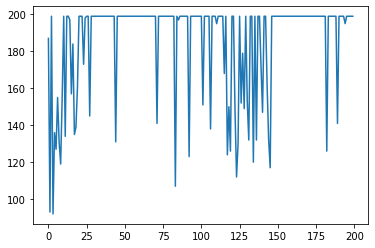

In [3]:

plt.plot(range(i_episode+1),plotX)
plt.show()

In [4]:
for i_episode in range(100): #episode counter
    state = env.reset() #reset the game
    for t in range(1000):
        env.render()
        action = agent.act(state)
        # action = env.action_space.sample()
        nextState, reward, done, info = env.step(action)
        agent.remember(state, nextState, action, reward, done)
        agent.learn()
        state = nextState
        if done or t == 999:
            if i_episode % 20 == 0: print("Episode finished after {} timesteps".format(t+1))
            plotX.append(t)
            break
env.close()



Episode finished after 209 timesteps


In [ ]:
import gym
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Input
from keras.models import Sequential
from keras.optimizers import Adam
from keras import Model
import keras
import numpy as np
import tensorflow as tf
import random 
import matplotlib.pyplot as plt
from tqdm import tqdm

class Agent:
    def __init__(self, inputs, outputs):
        state = Input(shape = (inputs,))
        l1 = Dense(24, input_dim=inputs,activation='relu')(state)
        l2 = Dense(24, activation="relu", name="layer1")(l1)
        l3 = Dense(outputs, activation="softmax", name="layer2")(l2)
        
        # def closs(y_true, y_pred):
        #     loss = keras.backend.sum((-1 * y_pred * keras.backend.log(y_true)) + value)
        #     return loss
        model = Model(input = state, output = l3)
        model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.01))

        self.stateSize = inputs
        self.actionSize = outputs
        self.model = model

        self.actionMemory = []
        self.stateMemory = []
        self.nextstateMemory = []
        self.rewardMemory = []
        self.terminalMemory = []
        self.actionprobMemory = []


    def predict(self, state):
        stateConv = np.squeeze(state).reshape(1,-1)
        probs = self.model.predict(stateConv)
        return probs
    def act(self, state):
        qval = self.predict(state)
        prob = tf.nn.softmax(qval.flatten())
        # print(np.array(prob))
        action = np.random.choice(range(self.actionSize), p = np.array(prob))
        actiontosave = np.zeros((self.actionSize))
        actiontosave[action] = 1
        self.actionprobMemory.append(prob)
        self.actionMemory.append(actiontosave)

        return action

    def remember(self, state, nextState, action, reward, done):
        self.stateMemory.append(state)
        self.nextstateMemory.append(nextState)
        self.rewardMemory.append(reward)
        self.terminalMemory.append(done)


    def learn(self, alpha = 0.0001):
        v = np.zeros((len(self.actionMemory),1))
        gamma = 0.99
        # v[len(self.actionMemory)] = self.actionMemory[-1][reward]
        val = 0
        for t in reversed(range(len(self.actionMemory))): #todo: check lol
            val = self.rewardMemory[t] + gamma*val 
            v[t] = val
        
        avgReward = np.mean(self.rewardMemory)
        stdReward = np.std(self.rewardMemory)
        v = (v-avgReward) / stdReward

        self.rewardplot = val
        self.rewardplot2 = avgReward

        X =self.stateMemory
        X = np.transpose(X)

        Y = self.actionMemory * v  #action selected times its value (expected)
        Y = alpha * Y + self.actionprobMemory #at this point you have all your base probablities that you calculated except that the action you took is updated with the value * its probablity
        Y = np.transpose(Y)

        

        history = self.model.train_on_batch(X.T, Y.T)

        self.actionMemory = []
        self.stateMemory = []
        self.nextstateMemory = []
        self.rewardMemory = []
        self.terminalMemory = []
        self.actionprobMemory = []




env = gym.make('LunarLander-v2')
inputs = 8 #env.observation_space
outputs = 4 #env.action_space 
# print(inputs)
# print(outputs)

agent = Agent(inputs, outputs)
plotX = []
plotX2 = []
plotX3 = []
for i_episode in tqdm(range(3000)): #episode counter
    state = env.reset() #reset the game
    done = False
    t = 0
    # env.render()
    while done == False:
        # env.render()
        # if i_episode > 500: env.render()
        action = agent.act(state)
        nextState, reward, done, info = env.step(action)
        agent.remember(state, nextState, action, reward, done)
        state = nextState
        t+= 1
    agent.learn()
    # if i_episode % 20 == 0: print("Episode finished after {} timesteps".format(t+1))
    plotX.append(t)
    plotX2.append(agent.rewardplot)
    plotX3.append(agent.rewardplot)
env.close()


plt.plot(range(i_episode+1),plotX)
plt.show()
plt.plot(range(i_episode+1),plotX2)
plt.show()
plt.plot(range(i_episode+1),plotX3)
plt.show(

In [3]:
import gym
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Input
from keras.models import Sequential
from keras.optimizers import Adam
from keras import Model
import keras
import numpy as np
import tensorflow as tf
import random 
import matplotlib.pyplot as plt
from tqdm import tqdm

class Agent:
    def __init__(self, inputs, outputs):
        state = Input(shape = (inputs,))
        l1 = Dense(24, input_dim=inputs,activation='relu')(state)
        l2 = Dense(24, activation="relu", name="layer1")(l1)
        l3 = Dense(outputs, activation="softmax", name="layer2")(l2)
        
        # def closs(y_true, y_pred):
        #     loss = keras.backend.sum((-1 * y_pred * keras.backend.log(y_true)) + value)
        #     return loss
        model = Model(input = state, output = l3)
        model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.01))

        self.stateSize = inputs
        self.actionSize = outputs
        self.model = model

        self.actionMemory = []
        self.stateMemory = []
        self.nextstateMemory = []
        self.rewardMemory = []
        self.terminalMemory = []
        self.actionprobMemory = []


    def predict(self, state):
        stateConv = np.squeeze(state).reshape(1,-1)
        probs = self.model.predict(stateConv)
        return probs
    def act(self, state):
        qval = self.predict(state)
        prob = tf.nn.softmax(qval.flatten())
        print(np.array(prob))
        action = np.random.choice(range(self.actionSize), p = np.array(prob))
        actiontosave = np.zeros((self.actionSize))
        actiontosave[action] = 1
        self.actionprobMemory.append(prob)
        self.actionMemory.append(actiontosave)

        return action

    def remember(self, state, nextState, action, reward, done):
        self.stateMemory.append(state)
        self.nextstateMemory.append(nextState)
        self.rewardMemory.append(reward)
        self.terminalMemory.append(done)


    def learn(self, alpha = 0.0001):
        v = np.zeros((len(self.actionMemory),1))
        gamma = 0.99
        # v[len(self.actionMemory)] = self.actionMemory[-1][reward]
        val = 0
        for t in reversed(range(len(self.actionMemory))): #todo: check lol
            val = self.rewardMemory[t] + gamma*val 
            v[t] = val
        
        avgReward = np.mean(self.rewardMemory)
        stdReward = np.std(self.rewardMemory)
        v = (v-avgReward) / stdReward

        self.rewardplot = val
        self.rewardplot2 = avgReward

        X =self.stateMemory
        X = np.transpose(X)

        Y = self.actionMemory * v  #action selected times its value (expected)
        Y = alpha * Y + self.actionprobMemory #at this point you have all your base probablities that you calculated except that the action you took is updated with the value * its probablity
        Y = np.transpose(Y)

        

        history = self.model.train_on_batch(X.T, Y.T)

        self.actionMemory = []
        self.stateMemory = []
        self.nextstateMemory = []
        self.rewardMemory = []
        self.terminalMemory = []
        self.actionprobMemory = []




env = gym.make('CartPole-v0')
inputs = 4 #env.observation_space
outputs = 2 #env.action_space 
# print(inputs)
# print(outputs)

agent = Agent(inputs, outputs)
plotX = []
plotX2 = []
plotX3 = []
for i_episode in tqdm(range(3000)): #episode counter
    state = env.reset() #reset the game
    done = False
    t = 0
    # env.render()
    while done == False:
        # env.render()
        # if i_episode > 500: env.render()
        action = agent.act(state)
        nextState, reward, done, info = env.step(action)
        agent.remember(state, nextState, action, reward, done)
        state = nextState
        t+= 1
    agent.learn()
    # if i_episode % 20 == 0: print("Episode finished after {} timesteps".format(t+1))
    plotX.append(t)
    plotX2.append(agent.rewardplot)
    plotX3.append(agent.rewardplot)
env.close()


plt.plot(range(i_episode+1),plotX)
plt.show()
plt.plot(range(i_episode+1),plotX2)
plt.show()
plt.plot(range(i_episode+1),plotX3)
plt.show()

0%|          | 0/3000 [00:00<?, ?it/s][0.50089324 0.49910676]
[0.49681354 0.5031865 ]
[0.50074965 0.4992504 ]
[0.4966609 0.5033391]
[0.5004052  0.49959487]
[0.49649537 0.50350463]
[0.4932337  0.50676626]
[0.49009252 0.50990754]
[0.49301732 0.50698274]
[0.48986146 0.5101386 ]
[0.49294665 0.5070533 ]
[0.48971006 0.51028997]
[0.48646343 0.5135366 ]
[0.48990688 0.51009315]
[0.48635432 0.5136457 ]
  0%|          | 1/3000 [00:00<18:34,  2.69it/s][nan nan]



ValueError: probabilities contain NaN